<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/ase3001_exercises_an_eigenvalue_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An eigenvalue algorithm

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

<br>

---

We explore an eigenvalue algorithm: given a diagonalizable matrix
${\displaystyle A}$, the algorithm will produce a number
${\displaystyle \lambda }$, which is the greatest (in absolute value) eigenvalue of ${\displaystyle A}$, and a nonzero vector ${\displaystyle v}$, which is a corresponding eigenvector of ${\displaystyle \lambda }$, that is,
${\displaystyle Av=\lambda v}$.

<br>

The algorithm starts with a vector
${\displaystyle q_{0}}$, which may be an approximation to the dominant eigenvector or a random vector. The method is described by the recurrence relation

$${\displaystyle q_{k+1}={\frac {A q_{k}}{\|A q_{k}\|}}}$$

So, at every iteration, the vector
${\displaystyle q_{k}}$ is multiplied by the matrix
${\displaystyle A}$ and normalized.

If we assume
${\displaystyle A}$ has an eigenvalue that is strictly greater in magnitude than its other eigenvalues and the starting vector
${\displaystyle q_{0}}$ has a nonzero component in the direction of an eigenvector associated with the dominant eigenvalue, then a subsequence
${\displaystyle \left(q_{k}\right)}$ converges to an eigenvector associated with the dominant eigenvalue.

<br>

Under the two assumptions listed above, the sequence
${\displaystyle \left(\rho _{k}\right)}$ defined by

$${\displaystyle \rho_{k}={\frac {q_{k}^{T}A q_{k}}{q_{k}^{T}q_{k}}}}$$

converges to the dominant eigenvalue.

In [136]:
import numpy as np

np.random.seed(3001)
A = np.random.randn(100,100)
A = A.T@A


<br>

___

<br>

**(Problem 1)** Define a function `ase3001_ev_algorithm()` that receives a symmetric matrix $A$ and returns the largest eigenvalue of $A$. Repeat the algorithm until,

$$
  \epsilon_{k+1} = | \rho_{k+1}- \rho_k | \le 10^{-6}.
$$

Report the largest eigenvalue of $A$, and the number of iterations required. Check how rapidly $e_k$ diminishes in a $\log_{10}$ scale plot.

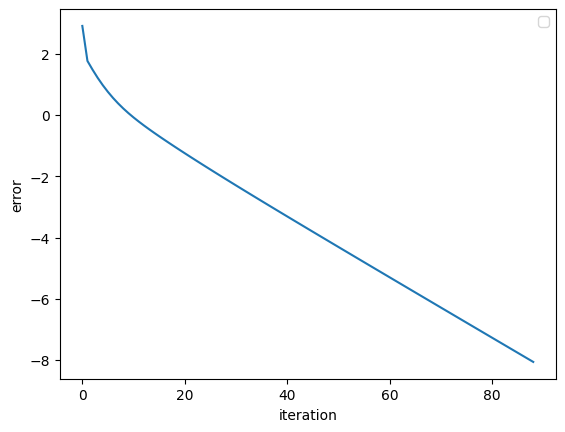

In [137]:
# your code here
import matplotlib.pyplot as plt
import numpy as np
def ase3001_ev_algorithm(A,q_0):
  q = q_0
  eigen_before=(1/np.linalg.norm(q))*(q.T @ A @ q)
  e=10
  e_l=[]
  while e> 10**(-8):
    q_after=A@q/(np.linalg.norm(A@q))
    eigen_after=(q_after.T @A@q_after)/(np.linalg.norm(q_after))
    e= np.abs(eigen_after-eigen_before)
    eigen_before= eigen_after
    q=q_after
    e_l.append(e)
  return eigen_after,q,e_l
e,q,es=ase3001_ev_algorithm(A,np.random.randn(len(A)))
plt.plot(np.log10(np.array(es)))
plt.xlabel("iteration")
plt.ylabel("error")
plt.legend()
plt.show()

<br>

___

<br>

**(Problem 2)** Use `ase3001_ev_algorithm()` to find all eigenvalues of $A$. Report all eigenvalues of $A$ and check if your answer is correct.



In [138]:
np.linalg.eigh(A)

EighResult(eigenvalues=array([1.22042046e-03, 5.41152548e-02, 8.00060141e-02, 2.09627375e-01,
       5.17968803e-01, 6.98496478e-01, 1.02894863e+00, 1.15711959e+00,
       1.66394653e+00, 2.56169650e+00, 2.68227294e+00, 3.10372577e+00,
       4.02381614e+00, 4.74095597e+00, 5.66046396e+00, 6.52218612e+00,
       6.84968426e+00, 7.23991650e+00, 8.54678214e+00, 8.63070982e+00,
       1.07635401e+01, 1.13643576e+01, 1.19881339e+01, 1.51870247e+01,
       1.58105728e+01, 1.59136752e+01, 1.77997560e+01, 1.99680389e+01,
       2.13638085e+01, 2.24045416e+01, 2.40715446e+01, 2.61089570e+01,
       2.75422942e+01, 2.90656355e+01, 3.00791891e+01, 3.04386758e+01,
       3.48135495e+01, 3.71896906e+01, 3.75051370e+01, 3.82235566e+01,
       4.06244386e+01, 4.31860389e+01, 4.60795370e+01, 4.67979973e+01,
       5.15499556e+01, 5.21239750e+01, 5.85019225e+01, 6.12308189e+01,
       6.30816133e+01, 6.41913196e+01, 6.54076891e+01, 7.15761639e+01,
       7.41711952e+01, 7.52356666e+01, 7.76353749e+01,

In [140]:
# your code here
sum_A=A.copy()
q_c= np.random.rand(len(A))
eigens=[]
for i in range(len(A)):
  eigen_c, q_c ,es = ase3001_ev_algorithm(sum_A,q_c)
  eigens.append(eigen_c)
  sum_A= sum_A- eigen_c *np.outer(q_c,q_c)


In [141]:
print(np.array(sorted(eigens))-np.linalg.eigh(A)[0])

[-1.22042397e-03  1.08811608e-08 -7.35986583e-09  4.52006638e-09
  1.13155491e-08 -9.74741565e-09  4.11800114e-08 -2.94697873e-08
 -4.94728747e-09  1.04990145e-07 -7.36610177e-08 -2.29594801e-08
  2.81415833e-08 -2.37243114e-10 -1.96204866e-08  1.32785690e-07
 -7.64348593e-08 -4.68623957e-08  5.03429465e-07 -4.98336187e-07
  2.78286016e-09  9.16432921e-08 -7.46815498e-08 -7.43137996e-09
  8.04474501e-07 -7.62095430e-07 -3.56821310e-08  7.40515134e-08
  3.36596564e-08 -9.78083428e-08 -2.86945578e-10  8.82176252e-08
 -8.29448723e-08 -2.87975865e-10  4.19309185e-07 -3.79358116e-07
 -2.92757321e-08  5.85555981e-07 -3.18899289e-07 -1.74860389e-07
  3.29932703e-09 -6.88140318e-08  3.19018525e-07 -3.13554139e-07
  4.50833312e-07 -4.04129523e-07 -3.19879234e-08 -8.39353476e-09
  2.86295929e-07 -1.26413084e-08 -2.11045943e-07 -4.54182896e-08
  4.04570471e-07 -2.70413040e-07 -1.17797669e-07  1.30332111e-07
 -1.31246509e-07 -5.04620346e-09  2.67274842e-07 -1.93648759e-07
 -6.38687112e-08  3.20743